In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import json
import datetime
import os

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



In [2]:
data = pd.read_csv('data/train.csv', delimiter=';')
#data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nous avons bien 891 lignes et 12 features dans notre jeu de données, comme attendu.
Quelques nulls pour l'Age, la Cabin et Embarked. Cabin contient de nombreux null.
Principalement du numérique, mais quelques features en object, à catégoriser.

1 - VUE D'ENSEMBLE DU DATASET
=============================

In [3]:
# Dimensions
print(f"\n Dimensions : {data.shape[0]} lignes × {data.shape[1]} colonnes")

# Aperçu des données
print("\n Premières lignes :")
display(data.head())

#n Infos
print("\n Infos sur le dataset :")
data.info()


# Statistiques descriptives
print("\n Statistiques descriptives (variables numériques) :")
display(data.describe())

# Types de données
print("\n Types de données :")
print(data.dtypes)

#Taux de survie
survival_rate = data['Survived'].mean() * 100
print(f"\n Taux de survie global : {survival_rate:.2f}%")



 Dimensions : 891 lignes × 12 colonnes

 Premières lignes :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



 Infos sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 Statistiques descriptives (variables numériques) :


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



 Types de données :
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 Taux de survie global : 38.38%


TRAITEMENT DES NULL
========================

In [4]:
#Décompte préliminaire. On en fait un peu trop pour pratiquer les outils...

missing = data.isnull().sum()
print('Il manque ces données:')
print(missing) 

Il manque ces données:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
#En pourcentage décroissant et en graph:
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs manquantes': missing.values,
    'Pourcentage': (missing.values / len(data)) * 100
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values(by='Pourcentage', ascending=False)

display(missing_df)

fig = px.bar(missing_df, x='Colonne', y='Pourcentage', title='Pourcentage de valeurs manquantes par colonne', color_continuous_scale='Reds')

fig.show()

,Colonne,Valeurs manquantes,Pourcentage
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467


Observations:
===

La cabine et l'age comme données manquantes semblent problématiques et à traiter. Le champ 'Embarked', a priori non.

Les questions que je me pose, mes hypothèses:
- Pourquoi autant de cabines manquantes? Est-ce lié à la classe? En troisième, pas de cabine par exemple.
- La cabine reflète l'emplacement, donc cela doit être un critère important de survie. Voir comment utiliser ce que l'on a. Et Si l'échantillon à tester est homogène. Voir si la cabine apport plus d'info que la classe seule.
- Comment gérer l'âge car a priori les enfants et les femmes ont mieux survécu (A vérifier!!)
- Age + genre + classe/fare sont à mon avis les features proéminents.

On commence par le facile: Embarked

In [6]:
print(data[data['Embarked'].isna()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [7]:
#Je mets une valeur spécifique 'N' qui n'existe pas dans les autres valeurs de la colonne.
data2=data.copy()
data2.fillna({'Embarked': 'N'}, inplace=True)
data2['Embarked'].isna().sum()

0

In [8]:
#Pour les ages manquants, à quoi correspondent-ils? 
# A la 3me, aux bébés? Aux femmes à sui on ne demande pas l'âge?
# Regardons les données sur le lignes non null.
# Age moyen regroupement:
display(data.groupby(['Pclass'])['Age'].agg([
    ('Moyenne', 'mean'),
    ('Nombre', 'count')
]))

display(data.groupby(['Sex'])['Age'].agg([
    ('Médiane', 'mean'),
    ('Nombre', 'count')
]))

display(data.groupby(['Pclass', 'Sex'])['Age'].agg([
    ('Médiane', 'mean'),
    ('Nombre', 'count')
]))

display(data.groupby(['Pclass', 'Sex'])['Age'].agg([
    ('Médiane', 'mean'),
    ('Nombre', 'count')
]))

# Extraire le titre (entre la virgule et le point)
data2['Title'] = data2['Name'].str.extract(r',\s*([^\.]+)\.')
data['Title'] = data['Name'].str.extract(r',\s*([^\.]+)\.')

display(data.groupby(['Pclass', 'Title'])['Age'].agg([
    ('Médiane', 'mean'),
    ('Nombre', 'count'),
    ('Nulls', lambda x: x.isna().sum())  # ← AJOUTER CETTE LIGNE
]))




,Moyenne,Nombre
Pclass,,
1,38.233441,186
2,29.877630,173
3,25.140620,355


,Médiane,Nombre
Sex,,
female,27.915709,261
male,30.726645,453


Médiane  Nombre
Pclass Sex                      
1      female  34.611765      85
       male    41.281386     101
2      female  28.722973      74
       male    30.740707      99
3      female  21.750000     102
       male    26.507589     253

Médiane  Nombre
Pclass Sex                      
1      female  34.611765      85
       male    41.281386     101
2      female  28.722973      74
       male    30.740707      99
3      female  21.750000     102
       male    26.507589     253

Médiane  Nombre  Nulls
Pclass Title                                 
1      Capt          70.000000       1      0
       Col           58.000000       2      0
       Don           40.000000       1      0
       Dr            43.750000       4      1
       Jonkheer      38.000000       1      0
       Lady          48.000000       1      0
       Major         48.500000       2      0
       Master         5.306667       3      0
       Miss          30.000000      45      1
       Mlle          24.000000       2      0
       Mme           24.000000       1      0
       Mr            41.580460      87     20
       Mrs           40.882353      34      8
       Sir           49.000000       1      0
       the Countess  33.000000       1      0
2      Dr            38.500000       2      0
       Master         2.258889       9      0
       Miss          22.390625      32      2
       Mr            32.768293      82      9
       Mrs           33.682927      41      0
       Ms            28.000000       1      0
       Rev           43.166667       6      0
3      Master         5.350833      24      4
       Miss          16.123188      69     33
       Mr            28.724891     229     90
       Mrs           33.515152      33      9

Age_Was_Missing
0    714
1    177
Name: count, dtype: int64
Nulls restants : 0


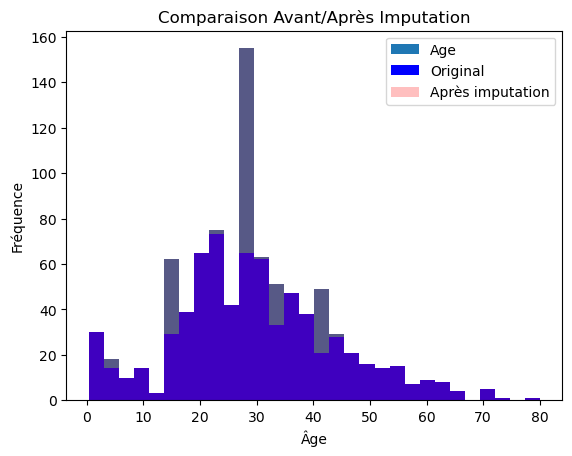

In [9]:
# Création FLAG AGE MISSING
data2['Age_Was_Missing'] = data['Age'].isna().astype(int)

# Puis imputer
data2['Age'] = data2.groupby(['Pclass', 'Title'])['Age'].transform(
    lambda x: x.fillna(x.mean())
)

# Vérifier
print(data2['Age_Was_Missing'].value_counts())
# 0 = avait un âge (714)
# 1 = était null (177)


# Vérifier
print("Nulls restants :", data2['Age'].isna().sum())

data2['Age'].plot.hist(bins=30, title='Distribution des âges après imputation')

# Distribution AVANT imputation (données originales)
data['Age'].plot(kind='hist', bins=30, alpha=1, 
                 label='Original', color='blue')

# Distribution APRÈS votre imputation
data2['Age'].plot(kind='hist', bins=30, alpha=0.25, 
                  label='Après imputation', color='red')

plt.legend()
plt.title('Comparaison Avant/Après Imputation')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

##  Note sur l'Imputation de l'Âge

**Méthode** : Imputation par la moyenne de chaque groupe (Pclass × Title)

**Impact** : 
- Pic visible à ~28 ans correspondant aux 90 "Mr" en classe 3 imputés
- Ce pic est artificiel mais **reflète l'âge typique** de ce groupe
- Alternative considérée : médiane globale → Encore plus biaisée

**Pour le ML** : 
- Option A : Créer variable `Age_Was_Missing` (flag)
- Option B : Accepter l'imputation (raisonnable pour EDA)

In [10]:
#Pour la cabine, je vais mettre 'Unknown'
data2.fillna({'Cabin' : 'Unknown'}, inplace=True)

In [11]:
#check nulls
data2.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Title              0
Age_Was_Missing    0
dtype: int64

Les nulls sont traités. On passe à l'analyse univariée.
===

In [12]:
data2.drop('PassengerId', axis=1, inplace=True)

Survived           1.000000
Pclass            -0.338481
Age               -0.076577
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
Age_Was_Missing   -0.092197
Name: Survived, dtype: float64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Age_Was_Missing'}>, <Axes: >, <Axes: >]],
      dtype=object)

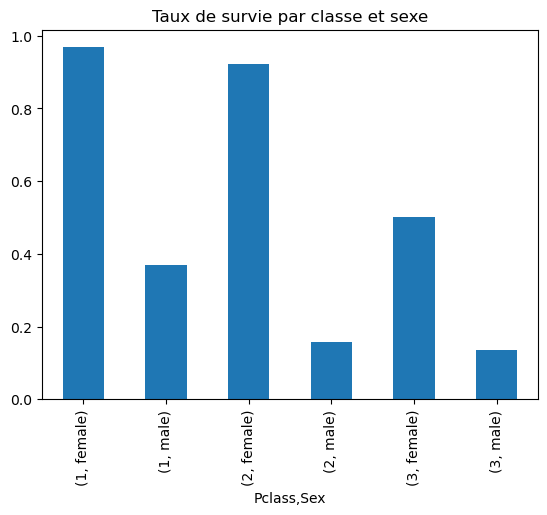

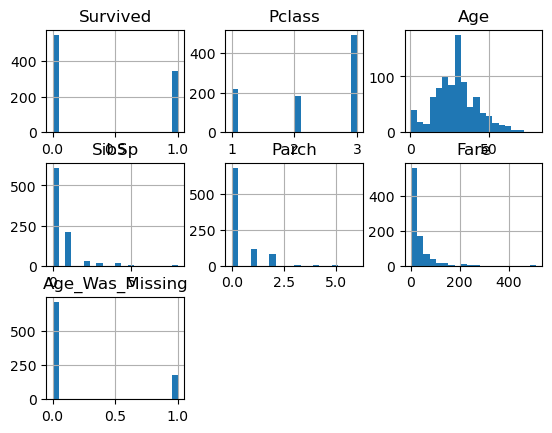

In [13]:
# Pour les données numériques
data2_num = data2.select_dtypes(include=[np.number])
#Coefficient de corrélation
data2_num_corr = data2_num.corr()['Survived']
display(data2_num_corr)


data2.groupby(['Pclass', 'Sex'])['Survived'].mean().plot(
    kind='bar', 
    title='Taux de survie par classe et sexe'
)

data2.hist(bins=20)

In [14]:
#export de data2
# Sauvegarder data2 en CSV
print("📂 Dossier actuel :", os.getcwd())
data2.to_csv('data/train_cleaned.csv', index=False)

print("✅ Dataset nettoyé sauvegardé : data/train_cleaned.csv")

📂 Dossier actuel : c:\_DEV\Learning Projects\titanic-survival-prediction
✅ Dataset nettoyé sauvegardé : data/train_cleaned.csv


Simplification ds titres rares. On va garder une catégorie pour les militaires.
* 'Militaire' pour Col, Capt, Major
* 'MrsNoble' pour Countess, Dona, Lady
* 'Miss' pour Ms, Mlle
* 'Mr' pour les autre titre masculin rares
On flag les titres rares dans une nouvells colonne 'Rare_Title'

In [15]:
# Créer copie
data3 = data2.copy()

# Flag pour titres rares (AVANT simplification)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
data3['Title_Is_Rare'] = (~data3['Title'].isin(common_titles)).astype(int)

# Mapping des titres
title_mapping = {
    # Militaires
    'Col': 'Militaire',
    'Capt': 'Militaire',
    'Major': 'Militaire',
    
    # Noblesse féminine
    'the Countess': 'MrsNoble',
    'Dona': 'MrsNoble',
    'Lady': 'MrsNoble',
    
    # Jeunes femmes
    'Ms': 'Miss',
    'Mlle': 'Miss',
    
    # Hommes rares → Mr
    'Don': 'Mr',
    'Rev': 'Mr',
    'Dr': 'Mr',
    'Sir': 'Mr',
    'Jonkheer': 'Mr',
    
    # Garder Mme comme Mrs
    'Mme': 'Mrs'
}

# Appliquer le mapping
data3['Title_Simple'] = data3['Title'].replace(title_mapping)

# ============================================================
# VÉRIFICATION
# ============================================================

print("="*60)
print("RÉSULTATS SIMPLIFICATION DES TITRES")
print("="*60)

print("\nTitres simplifiés :")
print(data3['Title_Simple'].value_counts())

print("\nFlag titres rares :")
print(data3['Title_Is_Rare'].value_counts())
print(f"   → {data3['Title_Is_Rare'].sum()} personnes avec titres rares")

print("\nTaux de survie par titre simplifié :")
survival_by_title = data3.groupby('Title_Simple')['Survived'].agg([
    ('Taux_survie', lambda x: f"{x.mean():.1%}"),
    ('Nombre', 'count')
]).sort_values('Nombre', ascending=False)
display(survival_by_title)

print("\n Mapping appliqué :")
original_to_simple = data3[['Title', 'Title_Simple']].drop_duplicates().sort_values('Title')
display(original_to_simple)

# SAUVEGARDE

data3.to_csv('data/train_engineered.csv', index=False)

print("\n" + "="*60)
print("Fichier sauvegardé : data/train_engineered.csv")
print(f"Shape : {data3.shape[0]} lignes × {data3.shape[1]} colonnes")
print("="*60)

RÉSULTATS SIMPLIFICATION DES TITRES

Titres simplifiés :
Title_Simple
Mr           533
Miss         185
Mrs          126
Master        40
Militaire      5
MrsNoble       2
Name: count, dtype: int64

Flag titres rares :
Title_Is_Rare
0    864
1     27
Name: count, dtype: int64
   → 27 personnes avec titres rares

Taux de survie par titre simplifié :


,Taux_survie,Nombre
Title_Simple,,
Mr,15.9%,533
Miss,70.3%,185
Mrs,79.4%,126
Master,57.5%,40
Militaire,40.0%,5
MrsNoble,100.0%,2



 Mapping appliqué :


,Title,Title_Simple
745,Capt,Militaire
647,Col,Militaire
30,Don,Mr
245,Dr,Mr
822,Jonkheer,Mr
556,Lady,MrsNoble
449,Major,Militaire
7,Master,Master
2,Miss,Miss
641,Mlle,Miss



Fichier sauvegardé : data/train_engineered.csv
Shape : 891 lignes × 15 colonnes


In [16]:
# Taille de la famille à bord
data2['FamilySize'] = data2['SibSp'] + data2['Parch'] + 1

# Voyager seul ?
data2['IsAlone'] = (data2['FamilySize'] == 1).astype(int)

# Vérifier impact sur survie
print(data2.groupby('IsAlone')['Survived'].mean())

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


In [17]:
#Les familles ont mieux survecu. On va en faire un feature:

# ============================================================
# FEATURE ENGINEERING : FAMILLE
# ============================================================

# Taille de la famille (inclut la personne elle-même)
data3['FamilySize'] = data3['SibSp'] + data3['Parch'] + 1

# Flag : 1 si EN FAMILLE, 0 si SEUL
data3['HasFamily'] = (data3['FamilySize'] > 1).astype(int)

# ============================================================
# VÉRIFICATION
# ============================================================

print("="*60)
print("👨‍👩‍👧‍👦 ANALYSE FAMILLE")
print("="*60)

print("\n📊 Distribution taille de famille :")
print(data3['FamilySize'].value_counts().sort_index())

print("\n👥 Répartition Seul vs Famille :")
print(data3['HasFamily'].value_counts())
print(f"   → Seuls : {(data3['HasFamily']==0).sum()} personnes")
print(f"   → En famille : {(data3['HasFamily']==1).sum()} personnes")

print("\n🎯 TAUX DE SURVIE :")
print("="*60)
survival_family = data3.groupby('HasFamily')['Survived'].agg([
    ('Taux_survie', lambda x: f"{x.mean():.1%}"),
    ('Survivants', 'sum'),
    ('Total', 'count')
])
survival_family.index = ['Seul', 'En Famille']
display(survival_family)

print("\n📊 Survie par taille de famille :")
survival_size = data3.groupby('FamilySize')['Survived'].agg([
    ('Taux_survie', lambda x: f"{x.mean():.1%}"),
    ('Nombre', 'count')
]).sort_values('Nombre', ascending=False)
display(survival_size)

# ============================================================
# SAUVEGARDE
# ============================================================

data3.to_csv('data/train_engineered.csv', index=False)

print("\n" + "="*60)
print("💾 Fichier mis à jour : data/train_engineered.csv")
print(f"📊 Shape : {data3.shape[0]} lignes × {data3.shape[1]} colonnes")
print("✅ Nouvelles features : FamilySize, HasFamily")
print("="*60)


👨‍👩‍👧‍👦 ANALYSE FAMILLE

📊 Distribution taille de famille :
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

👥 Répartition Seul vs Famille :
HasFamily
0    537
1    354
Name: count, dtype: int64
   → Seuls : 537 personnes
   → En famille : 354 personnes

🎯 TAUX DE SURVIE :


,Taux_survie,Survivants,Total
Seul,30.4%,163,537
En Famille,50.6%,179,354



📊 Survie par taille de famille :


,Taux_survie,Nombre
FamilySize,,
1,30.4%,537
2,55.3%,161
3,57.8%,102
4,72.4%,29
6,13.6%,22
5,20.0%,15
7,33.3%,12
11,0.0%,7
8,0.0%,6



💾 Fichier mis à jour : data/train_engineered.csv
📊 Shape : 891 lignes × 17 colonnes
✅ Nouvelles features : FamilySize, HasFamily


In [18]:
# ============================================================
# VÉRIFICATION : GRANDES FAMILLES EN CLASSE 3
# ============================================================

print("="*60)
print("🔍 ANALYSE : GRANDES FAMILLES & CLASSE SOCIALE")
print("="*60)

# Définir "grande famille"
data3['Large_Family'] = (data3['FamilySize'] >= 5).astype(int)

print("\n📊 Distribution des grandes familles par classe :")
large_families = data3[data3['Large_Family'] == 1]
print(large_families['Pclass'].value_counts().sort_index())

print("\n💰 Répartition classe pour grandes familles :")
display(large_families.groupby('Pclass').size())

print("\n⚰️ Taux de survie : Grandes familles par classe")
print("="*60)
survival_large = data3[data3['Large_Family'] == 1].groupby('Pclass')['Survived'].agg([
    ('Taux_survie', lambda x: f"{x.mean():.1%}"),
    ('Survivants', 'sum'),
    ('Total', 'count')
])
display(survival_large)

print("\n📊 COMPARAISON : Petites vs Grandes Familles")
print("="*60)
comparison = data3.groupby(['Pclass', 'Large_Family'])['Survived'].agg([
    ('Taux_survie', lambda x: f"{x.mean():.1%}"),
    ('Nombre', 'count')
])
comparison.index = comparison.index.set_levels(['Classe 1', 'Classe 2', 'Classe 3'], level=0)
comparison.index = comparison.index.set_levels(['Petite famille (1-4)', 'Grande famille (5+)'], level=1)
display(comparison)

print("\n🎨 Visualisation interactive :")
# Graphique interactif
survival_by_class_family = data3.groupby(['Pclass', 'FamilySize'])['Survived'].mean().reset_index()

fig = px.scatter(
    survival_by_class_family,
    x='FamilySize',
    y='Survived',
    color='Pclass',
    size=[20]*len(survival_by_class_family),
    title='Taux de survie : Taille Famille × Classe',
    labels={'Survived': 'Taux de survie', 'FamilySize': 'Taille de la famille'},
    color_continuous_scale='RdYlGn'
)
fig.add_hline(y=0.5, line_dash="dash", line_color="gray", annotation_text="50%")
fig.show()

🔍 ANALYSE : GRANDES FAMILLES & CLASSE SOCIALE

📊 Distribution des grandes familles par classe :
Pclass
1     6
2     2
3    54
Name: count, dtype: int64

💰 Répartition classe pour grandes familles :


Pclass
1     6
2     2
3    54
dtype: int64


⚰️ Taux de survie : Grandes familles par classe


,Taux_survie,Survivants,Total
Pclass,,,
1,66.7%,4,6
2,100.0%,2,2
3,7.4%,4,54



📊 COMPARAISON : Petites vs Grandes Familles


Taux_survie  Nombre
Pclass   Large_Family                            
Classe 1 Petite famille (1-4)       62.9%     210
         Grande famille (5+)        66.7%       6
Classe 2 Petite famille (1-4)       46.7%     182
         Grande famille (5+)       100.0%       2
Classe 3 Petite famille (1-4)       26.3%     437
         Grande famille (5+)         7.4%      54


🎨 Visualisation interactive :


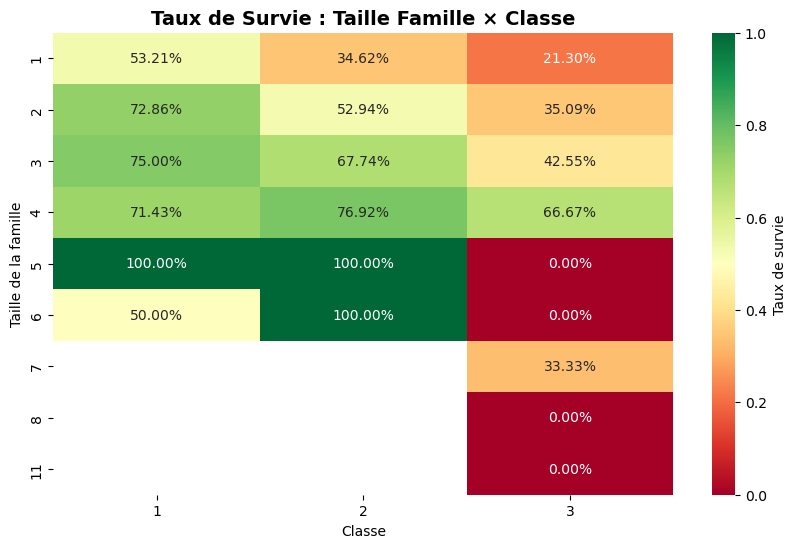

In [19]:
# Heatmap : Survie par Classe × Taille Famille
import matplotlib.pyplot as plt
import seaborn as sns

pivot_data = data3.pivot_table(
    values='Survived',
    index='FamilySize',
    columns='Pclass',
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_data,
    annot=True,
    fmt='.2%',
    cmap='RdYlGn',
    center=0.5,
    cbar_kws={'label': 'Taux de survie'}
)
plt.title('Taux de Survie : Taille Famille × Classe', fontsize=14, fontweight='bold')
plt.xlabel('Classe')
plt.ylabel('Taille de la famille')
plt.show()

In [20]:
# Extraire première lettre de la cabine (pont du bateau)
data3['Deck'] = data3['Cabin'].str[0]

# Les Unknown restent "Unknown"
data3.loc[data3['Cabin'] == 'Unknown', 'Deck'] = 'Unknown'

# Vérifier
print(data3['Deck'].value_counts())
print(data3.groupby('Deck')['Survived'].mean())

Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64
Deck
A          0.466667
B          0.744681
C          0.593220
D          0.757576
E          0.750000
F          0.615385
G          0.500000
T          0.000000
Unknown    0.299854
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Distribution des tarifs (Fare)')

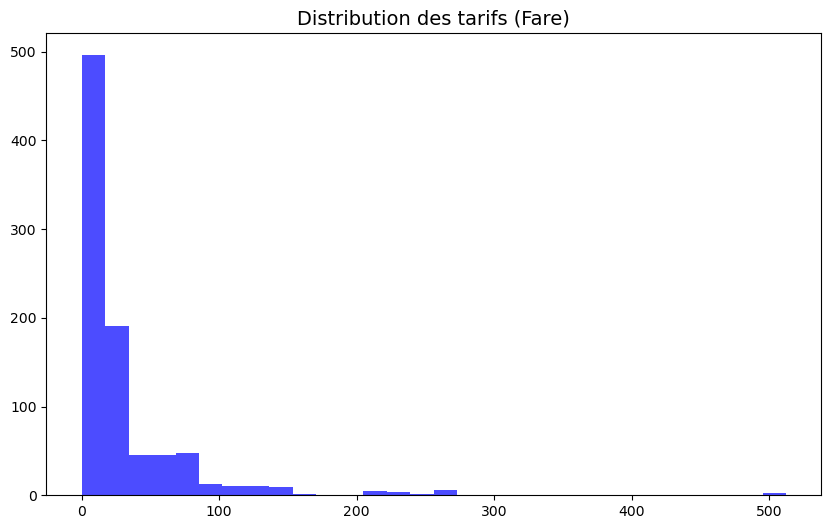

In [21]:
#Catégoriser le 'Fare'. Pour cela on commence par en regarder la répartition.
plt.figure(figsize=(10,6))
plt.hist(data3['Fare'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution des tarifs (Fare)', fontsize=14)

In [22]:
# Créer tranches de prix
data3['Fare_Category'] = pd.cut(
    data3['Fare'],
    bins=[-0.1, 10, 30, 100, 600],
    labels=['Low', 'Medium', 'High', 'Very_High']
)

print(data3.groupby('Fare_Category')['Survived'].mean())

Fare_Category
Low          0.199405
Medium       0.433022
High         0.535912
Very_High    0.735849
Name: Survived, dtype: float64


C:\Users\HomeAdmin\AppData\Local\Temp\ipykernel_25804\157148611.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: title={'center': 'Distribution des âges'}, ylabel='Frequency'>

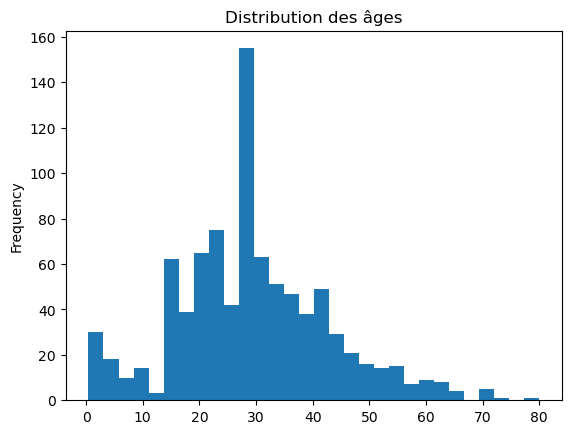

In [23]:
#On regare l'age
data3['Age'].plot.hist(bins=30, title='Distribution des âges')

In [24]:
#On catégorise par tranches d'âge:
data3['Age_Category'] = pd.cut(
    data3['Age'],
    bins=[0, 12, 20, 35, 60, 80],
    labels=['Enfant', 'Ado', 'Jeune_adulte', 'Adulte', 'Senior']
)
print(data3.groupby('Age_Category')['Survived'].mean())

#Check des nulls restants:
data3.isnull().sum()   

Age_Category
Enfant          0.575342
Ado             0.426573
Jeune_adulte    0.333333
Adulte          0.406250
Senior          0.227273
Name: Survived, dtype: float64


C:\Users\HomeAdmin\AppData\Local\Temp\ipykernel_25804\1777518436.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Title              0
Age_Was_Missing    0
Title_Is_Rare      0
Title_Simple       0
FamilySize         0
HasFamily          0
Large_Family       0
Deck               0
Fare_Category      0
Age_Category       0
dtype: int64

In [25]:
data3.to_csv('data/train_engineered_final.csv', index=False)
print("\n" + "="*60)
print("💾 Fichier final sauvegardé : data/train_engineered_final.csv")
print("="*60)


💾 Fichier final sauvegardé : data/train_engineered_final.csv



 Variables numériques analysées (11) :
   - Survived
   - Pclass
   - Age
   - SibSp
   - Parch
   - Fare
   - Age_Was_Missing
   - Title_Is_Rare
   - FamilySize
   - HasFamily
   - Large_Family

 CORRÉLATIONS AVEC LA SURVIE (du + au -) :
🟡 Fare                 : +0.257
🟡 HasFamily            : +0.203
⚪ Parch                : +0.082
⚪ Title_Is_Rare        : +0.022
⚪ FamilySize           : +0.017
⚪ SibSp                : -0.035
⚪ Age                  : -0.077
⚪ Age_Was_Missing      : -0.092
🔴 Large_Family         : -0.125
🔴 Pclass               : -0.338

 Génération de la heatmap...


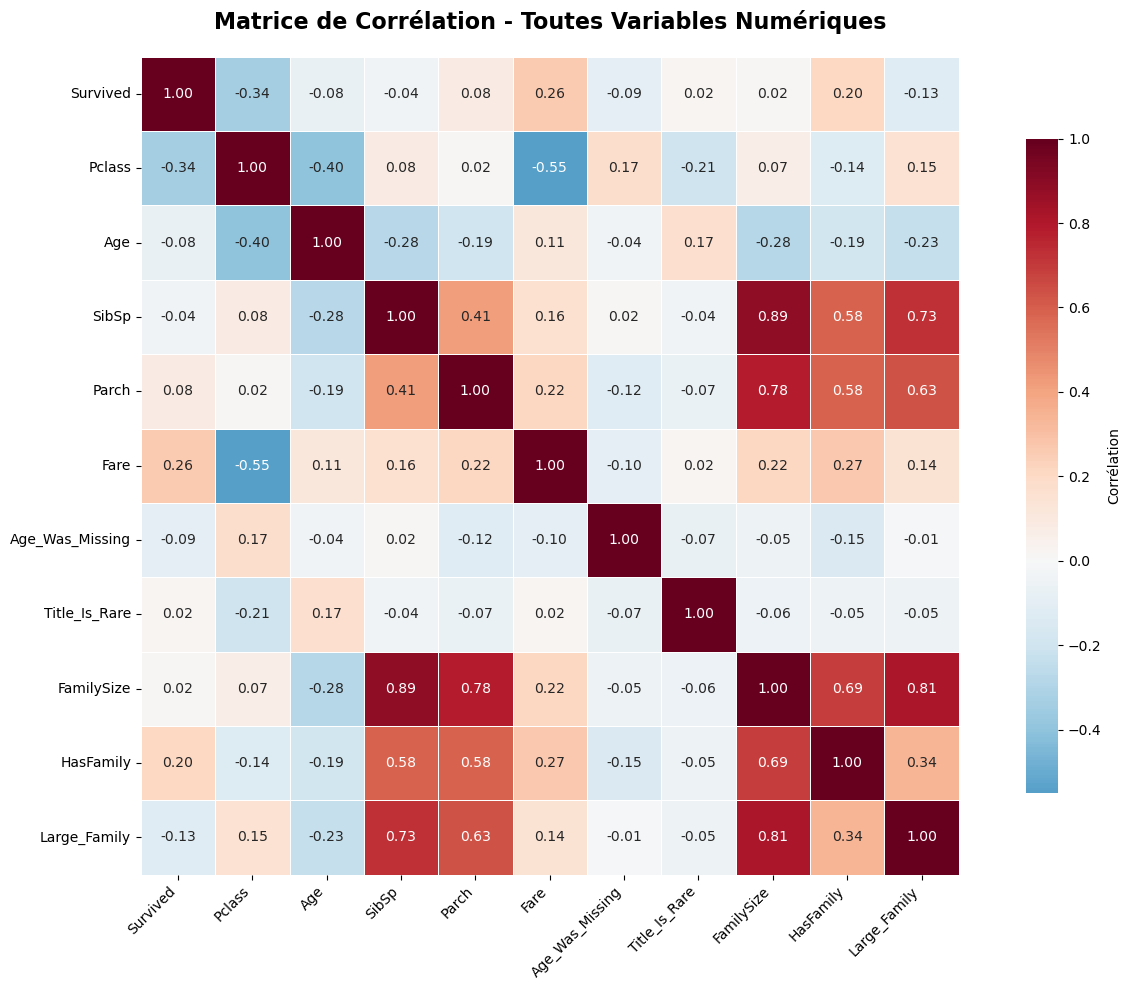

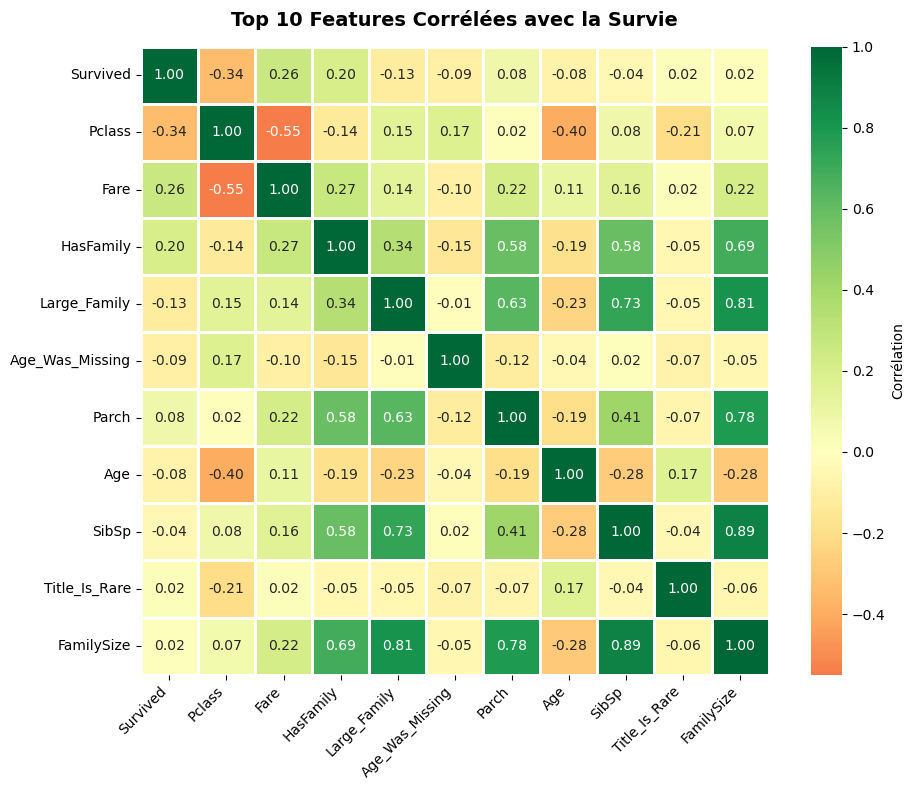


 MULTICOLINÉARITÉS DÉTECTÉES (|corr| > 0.7) :
   SibSp ↔ FamilySize : 0.891
   SibSp ↔ Large_Family : 0.731
   Parch ↔ FamilySize : 0.783
   FamilySize ↔ Large_Family : 0.815



In [26]:
# ============================================================
# ANALYSE DE CORRÉLATIONS
# ============================================================

# Sélectionner toutes les variables numériques
numeric_cols = data3.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n Variables numériques analysées ({len(numeric_cols)}) :")
for col in numeric_cols:
    print(f"   - {col}")

# Matrice de corrélation
corr_matrix = data3[numeric_cols].corr()

# Corrélations avec Survived (triées)
print("\n CORRÉLATIONS AVEC LA SURVIE (du + au -) :")
print("="*70)
survived_corr = corr_matrix['Survived'].sort_values(ascending=False)
for feature, corr_value in survived_corr.items():
    if feature != 'Survived':
        emoji = "🟢" if corr_value > 0.3 else "🟡" if corr_value > 0.1 else "🔴" if corr_value < -0.1 else "⚪"
        print(f"{emoji} {feature:20s} : {corr_value:+.3f}")

# ============================================================
# HEATMAP COMPLÈTE
# ============================================================

print("\n Génération de la heatmap...")

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Corrélation"}
)
plt.title('Matrice de Corrélation - Toutes Variables Numériques', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# HEATMAP FOCALISÉE : TOP FEATURES vs SURVIVED
# ============================================================

# Sélectionner les features les plus corrélées avec Survived
top_features = survived_corr.drop('Survived').abs().nlargest(10).index.tolist()
top_features.insert(0, 'Survived')

plt.figure(figsize=(10, 8))
sns.heatmap(
    data3[top_features].corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"label": "Corrélation"}
)
plt.title('Top 10 Features Corrélées avec la Survie', 
          fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# ANALYSE DES MULTICOLINÉARITÉS
# ============================================================

print("\n MULTICOLINÉARITÉS DÉTECTÉES (|corr| > 0.7) :")
print("="*70)

# Trouver les paires fortement corrélées
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Corrélation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"   {pair['Feature_1']} ↔ {pair['Feature_2']} : {pair['Corrélation']:.3f}")
else:
    print("   ✅ Aucune multicolinéarité forte détectée")

print("\n" + "="*70)

📊 TAUX DE SURVIE PAR FEATURE CATÉGORIELLE


C:\Users\HomeAdmin\AppData\Local\Temp\ipykernel_25804\2203804046.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\HomeAdmin\AppData\Local\Temp\ipykernel_25804\2203804046.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



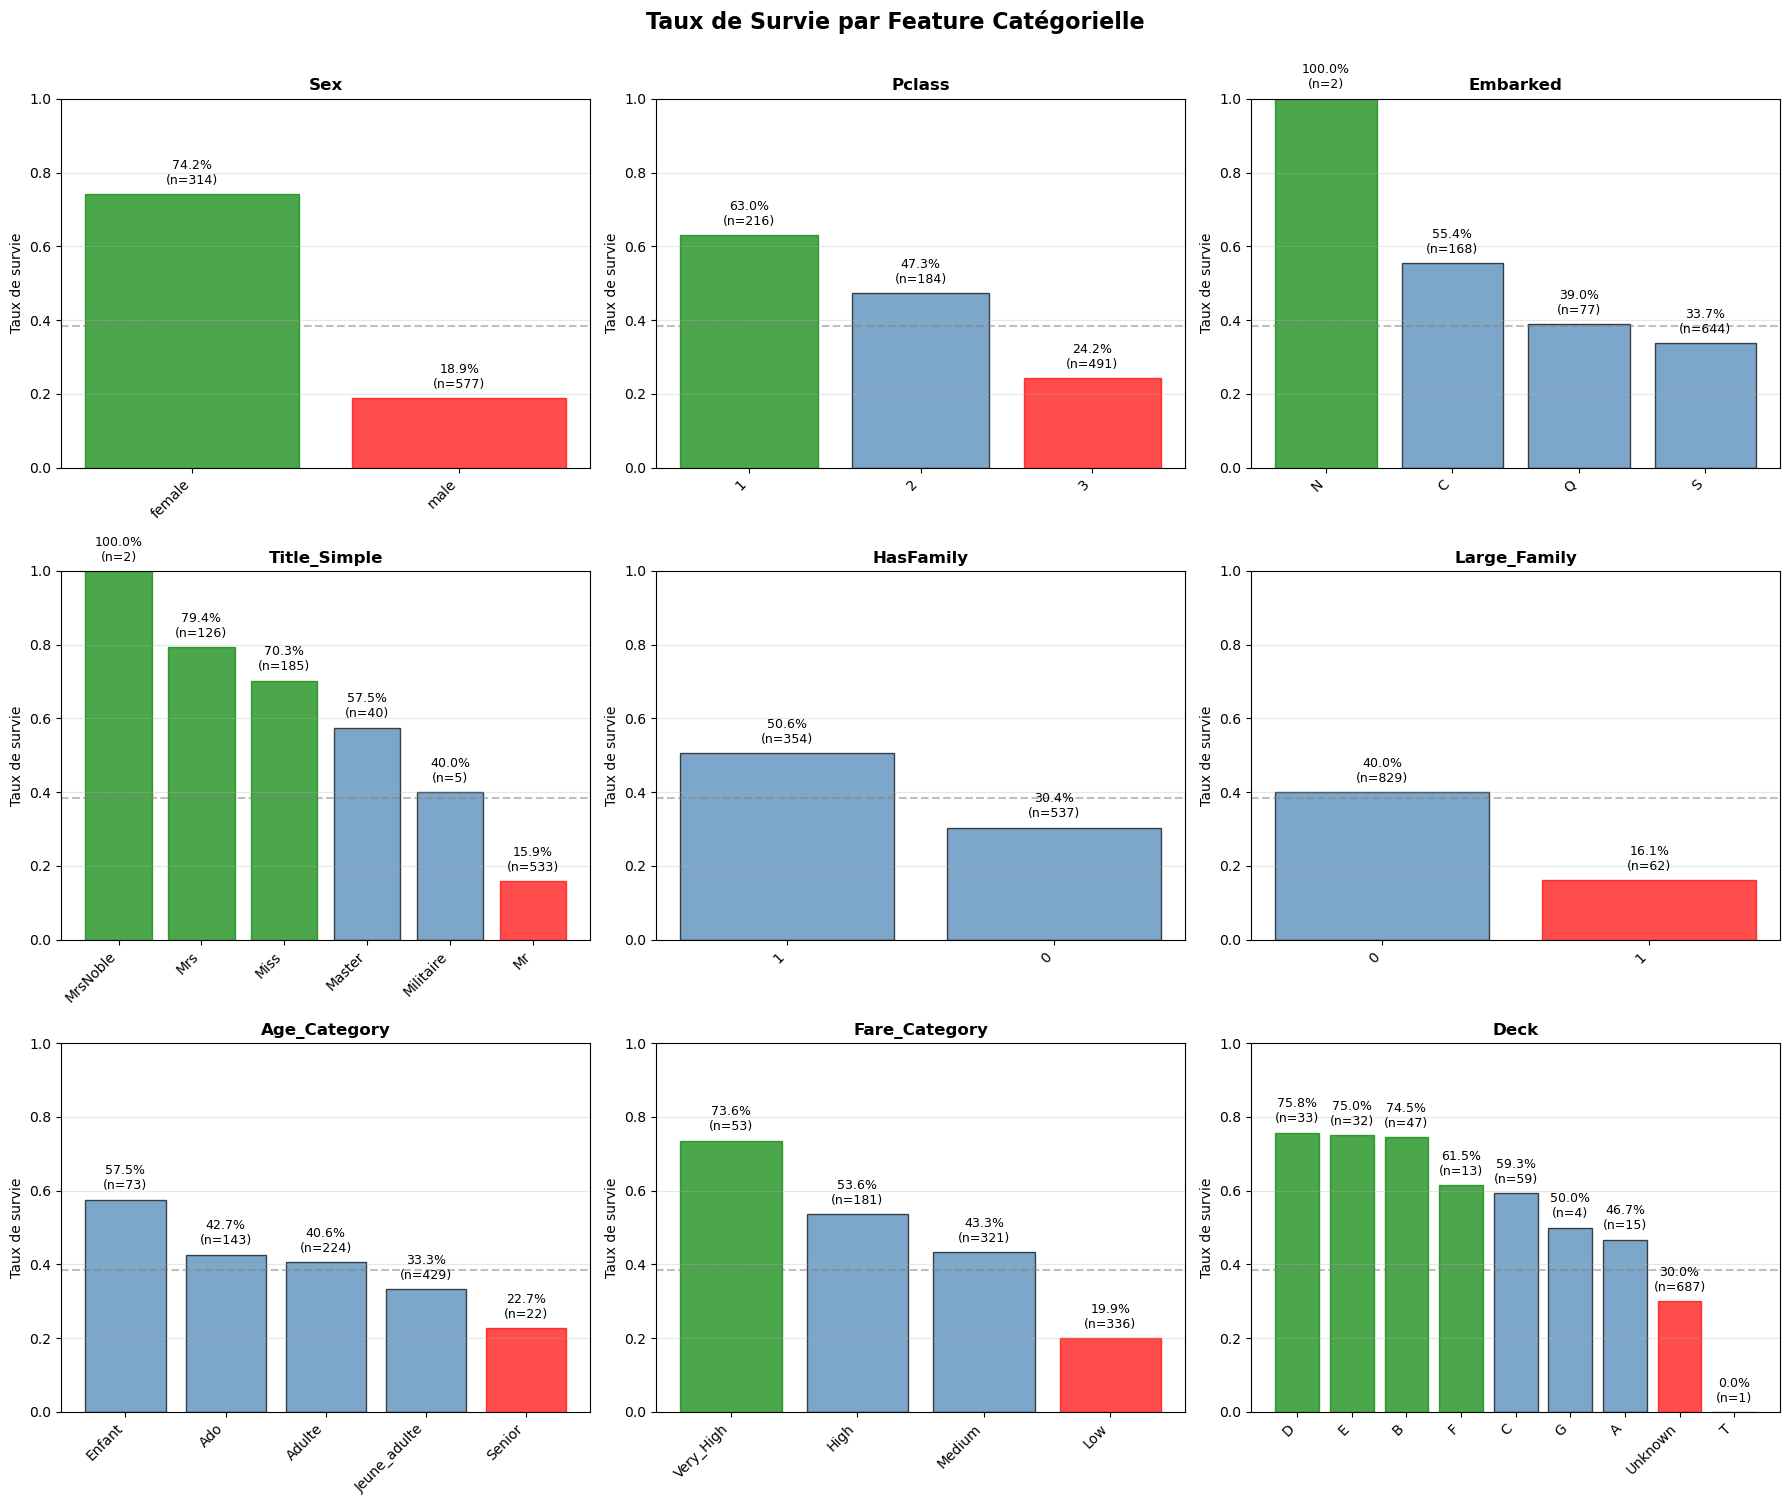

✅ Visualisations générées !


In [27]:
# ============================================================
# VISUALISATIONS : FEATURES CATÉGORIELLES vs SURVIVED
# ============================================================

print("="*70)
print("📊 TAUX DE SURVIE PAR FEATURE CATÉGORIELLE")
print("="*70)

# Features catégorielles à analyser
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title_Simple', 
                'HasFamily', 'Large_Family', 'Age_Category', 
                'Fare_Category', 'Deck']

# Filtrer celles qui existent
cat_features = [f for f in cat_features if f in data3.columns]

# Créer subplots
n_features = len(cat_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for idx, feature in enumerate(cat_features):
    ax = axes[idx]
    
    # Calculer taux de survie
    survival_rate = data3.groupby(feature)['Survived'].agg(['mean', 'count'])
    survival_rate = survival_rate.sort_values('mean', ascending=False)
    
    # Créer barplot
    bars = ax.bar(range(len(survival_rate)), survival_rate['mean'], 
                   color='steelblue', alpha=0.7, edgecolor='black')
    
    # Colorer selon le taux
    for i, bar in enumerate(bars):
        if survival_rate['mean'].iloc[i] > 0.6:
            bar.set_color('green')
        elif survival_rate['mean'].iloc[i] < 0.3:
            bar.set_color('red')
    
    # Labels
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de survie')
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(survival_rate)))
    ax.set_xticklabels(survival_rate.index, rotation=45, ha='right')
    ax.axhline(y=0.384, color='gray', linestyle='--', alpha=0.5, label='Moyenne globale')
    ax.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs + effectifs
    for i, (val, count) in enumerate(zip(survival_rate['mean'], survival_rate['count'])):
        ax.text(i, val + 0.02, f'{val:.1%}\n(n={count})', 
                ha='center', va='bottom', fontsize=9)

# Masquer axes vides
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Taux de Survie par Feature Catégorielle', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✅ Visualisations générées !")

In [28]:
# ============================================================
# VISUALISATIONS INTERACTIVES
# ============================================================

# 1. Sunburst : Hiérarchie Survie, Classe, Sexe, Catégorie d'âge
print("\n📊 Génération Sunburst interactif...")

fig = px.sunburst(
    data3,
    path=['Survived', 'Sex', 'Pclass', 'Age_Category'],
    title='Hiérarchie de Survie : Classe → Sexe → Survie',
    color='Survived',
    color_continuous_scale='RdYlGn',
    height=600
)
fig.show()

# 2. Barplot interactif : Toutes les features
print("\n📊 Génération barplot interactif...")

survival_data = []
for feature in cat_features[:6]:  # Top 6 features
    temp = data3.groupby(feature)['Survived'].mean().reset_index()
    temp['Feature'] = feature
    temp.columns = ['Category', 'Survival_Rate', 'Feature']
    survival_data.append(temp)

survival_df = pd.concat(survival_data, ignore_index=True)

fig = px.bar(
    survival_df,
    x='Category',
    y='Survival_Rate',
    color='Feature',
    barmode='group',
    title='Comparaison Taux de Survie - Toutes Features',
    labels={'Survival_Rate': 'Taux de survie', 'Category': 'Catégorie'},
    height=500
)
fig.add_hline(y=0.384, line_dash="dash", line_color="gray", 
              annotation_text="Moyenne globale (38.4%)")
fig.show()

# 3. Scatter : Age vs Fare coloré par Survie
print("\n📊 Génération scatter Age vs Fare...")

fig = px.scatter(
    data3,
    x='Age',
    y='Fare',
    color='Survived',
    facet_col='Pclass',
    title='Age vs Fare par Classe (coloré par Survie)',
    labels={'Survived': 'A survécu'},
    opacity=0.6,
    height=400
)
fig.show()

print("\n✅ Toutes les visualisations sont générées !")
print("="*70)


📊 Génération Sunburst interactif...


c:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




📊 Génération barplot interactif...



📊 Génération scatter Age vs Fare...



✅ Toutes les visualisations sont générées !


# 🔍 INSIGHTS CLÉS DE L'ANALYSE EXPLORATOIRE

## 🎯 Features Principales Influençant la Survie

### 1. **Sexe** - Impact Majeur ⭐⭐⭐
- **Corrélation la plus forte** avec la survie
- Les femmes ont un taux de survie nettement supérieur aux hommes
- Confirme la politique "Women and children first"

### 2. **Classe Sociale (Pclass)** - Impact Fort ⭐⭐⭐
- Corrélation négative : plus la classe est élevée (1 > 2 > 3), meilleure est la survie
- La 1ère classe bénéficie d'un accès privilégié aux canots de sauvetage
- Effet amplifié lorsque combiné avec le sexe (femmes 1ère classe ≈ 97% survie)

### 3. **Titre (Title_Simple)** - Reflet du Sexe + Âge + Statut ⭐⭐
- **Master** (jeunes garçons) : Taux de survie supérieur à "Mr" adultes
  - Confirme la priorité aux enfants
- **Militaires** : Taux de survie supérieur à "Mr" standard
  - ⚠️ **Hypothèse réfutée** : Ce n'est probablement PAS dû à un "sens de l'honneur militaire"
  - **Explication probable** : Corrélation avec la classe sociale (militaires en 1ère/2ème classe)
- **MrsNoble** : Taux de survie de 100%
  - ⚠️ **Attention** : Échantillon très faible (n=2), statistiquement non significatif
  - Reflète privilège classe + sexe

## 🔗 Multicolinéarité Détectée

### Features Redondantes
- **Fare ↔ Pclass** : Forte corrélation (le prix reflète la classe)
- **Title_Simple ↔ Sex** : Les titres encodent le sexe (Mr/Master vs Miss/Mrs)
- **FamilySize ↔ SibSp + Parch** : Construction mathématique directe

**💡 Implication pour le ML** : Risque de surajustement si toutes les features sont utilisées. Sélection nécessaire.

## 🚢 Port d'Embarquement (Embarked) - Effet Indirect ⭐

### Observation
- Le port d'embarquement semble corrélé avec la survie

### Hypothèse
- **Pas un effet causal direct** (le port en soi ne cause pas la survie)
- **Effet confondant probable** : Les passagers de 3ème classe embarquent majoritairement depuis certains ports
- **Recommandation** : Croiser Embarked × Pclass pour valider

## 👨‍👩‍👧‍👦 Taille de Famille - Effet Non-Linéaire ⭐⭐

### Pattern Observé
- **Petites familles (2-4 personnes)** : Taux de survie supérieur aux solitaires
- **Grandes familles (5+ personnes)** : Taux de survie très faible

### Explication Probable
- **Grandes familles** → Majoritairement en **classe 3** → Accès difficile aux ponts supérieurs
- Confirme l'interaction Classe × Famille

## 🎂 Âge - Effet Modéré ⭐

### Observations
- **Enfants** : Légèrement mieux que les adultes (priorité relative)
- **Effet moins fort** que prévu par le slogan "Women and children first"
- **Interaction avec le sexe** : Les petites filles survivent mieux que les petits garçons

## 💰 Fare - Proxy de la Classe ⭐

- Corrélation positive avec la survie
- **Redondant avec Pclass** : Mesure le même concept (statut socio-économique)
- **Utilité** : Peut capturer des nuances au sein d'une même classe

## 🚪 Deck (Pont de Cabine) - Information Limitée

- **77% de données manquantes** ("Unknown")
- Les ponts connus montrent des différences de survie
- **Probable biais** : Seuls les passagers aisés (1ère/2ème classe) ont des cabines enregistrées

---

## 📈 Hiérarchie d'Importance des Features

### Niveau 1 - Impact Direct Fort
1. **Sex** (Sexe)
2. **Pclass** (Classe sociale)

### Niveau 2 - Impact Modéré (souvent redondant avec Niveau 1)
3. **Title_Simple** (Titre - encode sexe + âge + statut)
4. **Fare** (Prix - proxy de classe)
5. **Age** (Âge)

### Niveau 3 - Impact Faible ou Contextuel
6. **FamilySize / HasFamily** (Effet non-linéaire)
7. **Embarked** (Effet indirect via classe)
8. **Deck** (Trop de données manquantes)

---

## 🎯 Recommandations pour le Machine Learning

### Features à Privilégier
✅ **Sex, Pclass, Title_Simple, Age, FamilySize, HasFamily**

### Features à Évaluer
⚠️ **Fare** (redondant avec Pclass, mais peut apporter nuance)  
⚠️ **Embarked** (tester si améliore le modèle)

### Features à Éviter
❌ **Deck** (trop de nulls)  
❌ **SibSp + Parch** séparément (utiliser FamilySize à la place)  
❌ **Title** original (utiliser Title_Simple)

### Stratégie d'Encodage
- **Sex, Embarked, Title_Simple** → One-Hot Encoding ou Label Encoding
- **Pclass** → Peut rester numérique (ordre naturel 1 < 2 < 3)
- **Age, Fare** → Normalisation/Standardisation selon le modèle

### Gestion des Interactions
- Créer features d'interaction : **Sex × Pclass**, **Age × Sex**
- Tester des modèles capables de capturer les interactions (Random Forest, XGBoost)

---

## 💡 Insights Historiques Validés

✅ **"Women and children first"** → Confirmé (surtout pour les femmes)  
✅ **Privilège de classe** → Fortement confirmé  
❌ **"Sens de l'honneur militaire"** → Réfuté (effet confondu avec la classe sociale)  
✅ **Grandes familles en 3ème classe** → Confirmé comme facteur de risque majeur